In [71]:
import pandas as pd

In [72]:
dataf = pd.read_csv("cagi.mpra.per_model.scores.tsv", sep="\t", header=0)

In [73]:
dataf.head()

,chr,pos,allele1,allele2,rsid,logfc.mean,sign_jsd.mean,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,label,...,ref,alt,chr_hg38,pos_hg38,ref_hg38,alt_hg38,label_hg38,Confidence_hg38,SAD,SAR
0,chr6,37775290,G,A,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv",-0.130221,-0.029623,0.000808,0.057231,0.03,...,G,A,chr6,37807514,G,A,0.03,0.01,-0.021439,-0.025864
1,chr6,37775290,G,C,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv",-0.079846,-0.022760,0.000452,0.125456,0.03,...,G,C,chr6,37807514,G,C,0.03,0.01,-0.013206,-0.015869
2,chr6,37775290,G,T,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv",-0.102046,-0.031783,0.000633,0.065748,0.07,...,G,T,chr6,37807514,G,T,0.07,0.01,-0.022903,-0.027649
3,chr6,37775291,T,A,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv",0.015090,0.021831,0.000192,0.174132,-0.07,...,T,A,chr6,37807515,T,A,-0.07,0.01,0.005508,0.006592
4,chr6,37775291,T,C,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv",0.072389,0.028991,0.000554,0.099254,0.03,...,T,C,chr6,37807515,T,C,0.03,0.01,0.028412,0.033691


In [74]:
dataf.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'sign_jsd.mean', 'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval', 'label', 'Confidence',
       'challenge', 'model_used', 'chr_hg19', 'pos_hg19', 'ref', 'alt',
       'chr_hg38', 'pos_hg38', 'ref_hg38', 'alt_hg38', 'label_hg38',
       'Confidence_hg38', 'SAD', 'SAR'],
      dtype='object')

In [75]:
import numpy as np
dataf = dataf[~np.isnan(dataf["SAD"])]

In [76]:
challenges = list(set(dataf["challenge"]))

In [116]:
import scipy.stats
pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}
pear_dict_enf_sar = {}
for challenge in challenges:
    temp = dataf[dataf["challenge"] == challenge]
    models = list(set(temp["model_used"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    pear_dict_enf_sar[challenge] = []
    for model in models:
        temp_new = temp[temp["model_used"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

        pear = scipy.stats.pearsonr(temp_new["label"],temp_new["logfc.mean"])
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(temp_new["label"],temp_new["sign_jsd.mean"])
        pear_dict_jsd[challenge].append(pear)

        pear1 = scipy.stats.pearsonr(temp_new["label"],temp_new["SAD"])
        pear2 = scipy.stats.pearsonr(temp_new["label"],temp_new["SAR"])
        
        pear_dict_enf[challenge].append(pear1)
        pear_dict_enf_sar[challenge].append(pear2)

#         pear = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["logfc.mean"]))
#         pear_dict_logfc[challenge].append(pear)

#         pear = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["sign_jsd.mean"]))
#         pear_dict_jsd[challenge].append(pear)

#         pear1 = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["SAD"]))
#         pear2 = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["SAR"]))
        
#         pear_dict_enf[challenge].append(pear1)
#         pear_dict_enf_sar[challenge].append(pear2)



In [117]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
best_pear_sar = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 
    best_pear_sar.append(np.max(pear_dict_enf_sar[key]))  

challenge_MSMB.tsv (0.19855880983217153, 0.09520784539427939)
challenge_HBB.tsv (0.5472988538268535, 0.5777343256266372)
challenge_LDLR.tsv (0.5571818417723304, 0.5993377023399556)
challenge_SORT1.tsv (0.7609120286314868, 0.6128270356550973)
challenge_PKLR.tsv (0.8120143586029585, 0.7808898228177903)
challenge_IRF4.tsv (0.8154299895742269, 0.6194705136131787)
challenge_HBG1.tsv (0.5437910247812469, 0.17844376595518469)
challenge_MYCrs6983267.tsv (0.5078362906951961, 0.5271069007208296)
challenge_ZFAND3.tsv (0.44484781066968043, 0.4842148015081688)
challenge_IRF6.tsv (0.6863978095129647, 0.6589761892033787)
challenge_TERT-HEK293T.tsv (0.5553154805041812, 0.5952787463573234)
challenge_F9.tsv (0.3278058135324871, 0.28833966564695757)
challenge_GP1BB.tsv (0.5215335208116025, 0.5632784392741983)
challenge_HNF4A.tsv (0.34006638384182497, 0.2882221742640615)


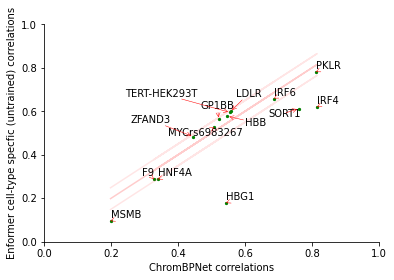

In [118]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

challenge_MSMB.tsv (0.19855880983217153, 0.11747552572198068)
challenge_HBB.tsv (0.5472988538268535, 0.5963431617909264)
challenge_LDLR.tsv (0.5571818417723304, 0.6400788914766323)
challenge_SORT1.tsv (0.7609120286314868, 0.6451592431151819)
challenge_PKLR.tsv (0.8120143586029585, 0.8131728750016707)
challenge_IRF4.tsv (0.8154299895742269, 0.7144655925355718)
challenge_HBG1.tsv (0.5437910247812469, 0.2306480685800073)
challenge_MYCrs6983267.tsv (0.5078362906951961, 0.531071916776147)
challenge_ZFAND3.tsv (0.44484781066968043, 0.49660231505400293)
challenge_IRF6.tsv (0.6863978095129647, 0.6491011671352478)
challenge_TERT-HEK293T.tsv (0.5553154805041812, 0.5844841342987368)
challenge_F9.tsv (0.3278058135324871, 0.29587888379366384)
challenge_GP1BB.tsv (0.5215335208116025, 0.5624264864931722)
challenge_HNF4A.tsv (0.34006638384182497, 0.28158864209788315)


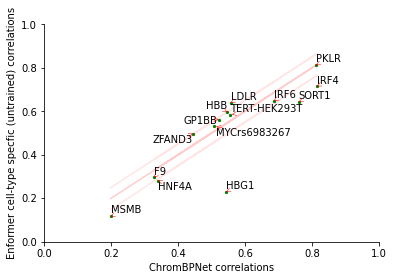

In [119]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sar, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sar[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sar[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

challenge_MSMB.tsv (0.23884388933617556, 0.09520784539427939)
challenge_HBB.tsv (0.5698413608177562, 0.5777343256266372)
challenge_LDLR.tsv (0.5467644140523147, 0.5993377023399556)
challenge_SORT1.tsv (0.708297065900647, 0.6128270356550973)
challenge_PKLR.tsv (0.7930240481527618, 0.7808898228177903)
challenge_IRF4.tsv (0.7497534109732615, 0.6194705136131787)
challenge_HBG1.tsv (0.503740228594714, 0.17844376595518469)
challenge_MYCrs6983267.tsv (0.5084297791443301, 0.5271069007208296)
challenge_ZFAND3.tsv (0.3968265961621204, 0.4842148015081688)
challenge_IRF6.tsv (0.5556701804309403, 0.6589761892033787)
challenge_TERT-HEK293T.tsv (0.4943933566895047, 0.5952787463573234)
challenge_F9.tsv (0.4535045167176045, 0.28833966564695757)
challenge_GP1BB.tsv (0.4261320559232507, 0.5632784392741983)
challenge_HNF4A.tsv (0.31176704261573024, 0.2882221742640615)


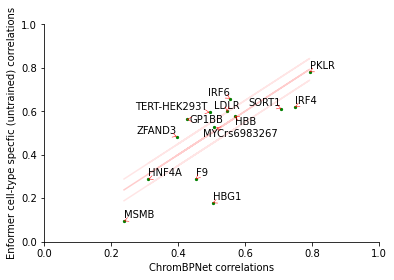

In [120]:

from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_jsd,best_pear_sad, s=5, c="g")
ax.plot(best_pear_jsd,best_pear_jsd, c="r",  alpha=0.2)
ax.plot(best_pear_jsd,np.array(best_pear_jsd)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_jsd,np.array(best_pear_jsd)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_jsd[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_jsd[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [126]:
import scipy.stats
pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}
pear_dict_enf_sar = {}
for challenge in challenges:
    temp = dataf[dataf["challenge"] == challenge]
    models = list(set(temp["model_used"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    pear_dict_enf_sar[challenge] = []
    for model in models:
        temp_new = temp[temp["model_used"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

#         pear = scipy.stats.pearsonr(temp_new["label"],temp_new["logfc.mean"])
#         pear_dict_logfc[challenge].append(pear)

#         pear = scipy.stats.pearsonr(temp_new["label"],temp_new["sign_jsd.mean"])
#         pear_dict_jsd[challenge].append(pear)

#         pear1 = scipy.stats.pearsonr(temp_new["label"],temp_new["SAD"])
#         pear2 = scipy.stats.pearsonr(temp_new["label"],temp_new["SAR"])
        
#         pear_dict_enf[challenge].append(pear1)
#         pear_dict_enf_sar[challenge].append(pear2)

        pear = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["logfc.mean"]))
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["sign_jsd.mean"]))
        pear_dict_jsd[challenge].append(pear)

        pear1 = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["SAD"]))
        pear2 = scipy.stats.pearsonr(abs(temp_new["label"]),abs(temp_new["SAR"]))
        
        pear_dict_enf[challenge].append(pear1)
        pear_dict_enf_sar[challenge].append(pear2)



In [127]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
best_pear_sar = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 
    best_pear_sar.append(np.max(pear_dict_enf_sar[key]))  

challenge_MSMB.tsv (0.18064507834629845, 0.07812276670116146)
challenge_HBB.tsv (0.4131418431199688, 0.43519130169648945)
challenge_LDLR.tsv (0.6045974580705764, 0.5838372212163301)
challenge_SORT1.tsv (0.7337050220520509, 0.5465667737423907)
challenge_PKLR.tsv (0.8194964319535258, 0.7863479773817957)
challenge_IRF4.tsv (0.8145174978461941, 0.5045105003994057)
challenge_HBG1.tsv (0.48106994565359995, 0.09046884578192874)
challenge_MYCrs6983267.tsv (0.5365007062961231, 0.5369289876911911)
challenge_ZFAND3.tsv (0.41884266063861497, 0.4607256612021779)
challenge_IRF6.tsv (0.688024621814145, 0.667289171982701)
challenge_TERT-HEK293T.tsv (0.43998778134423205, 0.5081399724206273)
challenge_F9.tsv (0.08162256518538383, 0.09360957733433492)
challenge_GP1BB.tsv (0.4954772436774826, 0.5165704527315866)
challenge_HNF4A.tsv (0.2964168915155524, 0.28990987975578736)


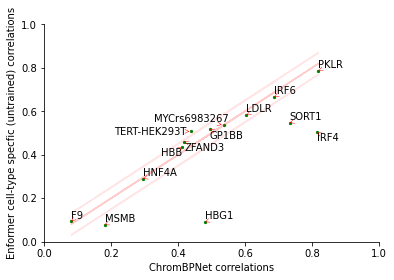

In [128]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [64]:
gt = dataf[["chr", "pos", "allele1", "allele2","challenge", "label", "Confidence"]].drop_duplicates()

In [65]:
gt.shape

(13215, 7)

In [66]:
gt

,chr,pos,allele1,allele2,challenge,label,Confidence
0,chr6,37775290,G,A,challenge_ZFAND3.tsv,0.03,0.01
1,chr6,37775290,G,C,challenge_ZFAND3.tsv,0.03,0.01
2,chr6,37775290,G,T,challenge_ZFAND3.tsv,0.07,0.01
3,chr6,37775291,T,A,challenge_ZFAND3.tsv,-0.07,0.01
4,chr6,37775291,T,C,challenge_ZFAND3.tsv,0.03,0.01
...,...,...,...,...,...,...,...
19688,chr6,396592,G,C,challenge_IRF4.tsv,0.12,0.02
19689,chr6,396592,G,T,challenge_IRF4.tsv,0.11,0.03
19690,chr6,396593,T,A,challenge_IRF4.tsv,0.15,0.07
19691,chr6,396593,T,C,challenge_IRF4.tsv,0.03,0.02


challenge_MSMB.tsv


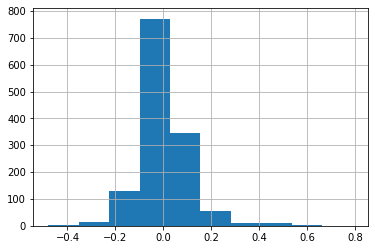

challenge_HBB.tsv


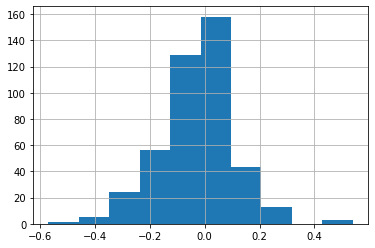

challenge_LDLR.tsv


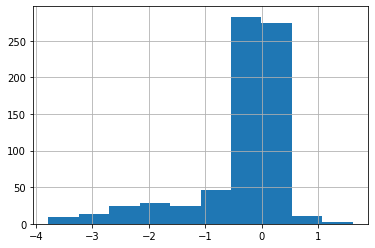

challenge_SORT1.tsv


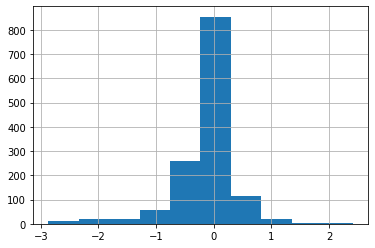

challenge_PKLR.tsv


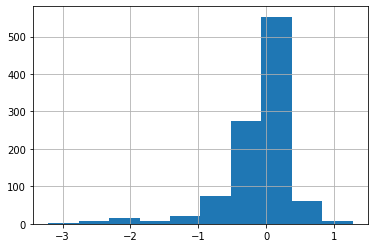

challenge_IRF4.tsv


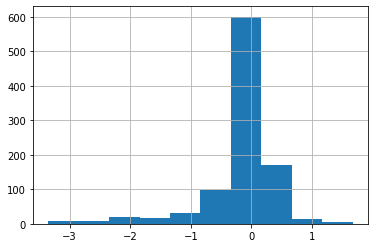

challenge_HBG1.tsv


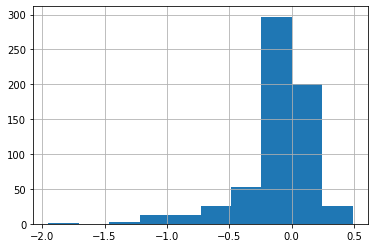

challenge_MYCrs6983267.tsv


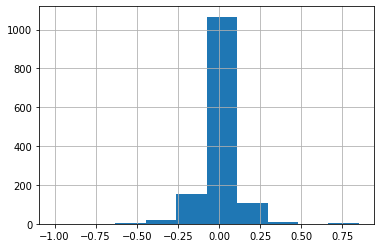

challenge_ZFAND3.tsv


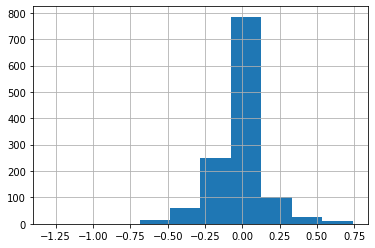

challenge_IRF6.tsv


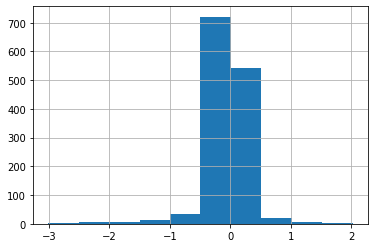

challenge_TERT-HEK293T.tsv


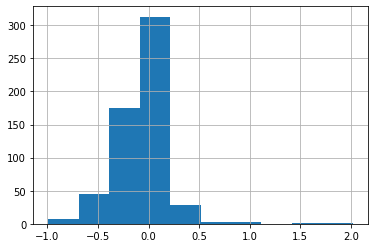

challenge_F9.tsv


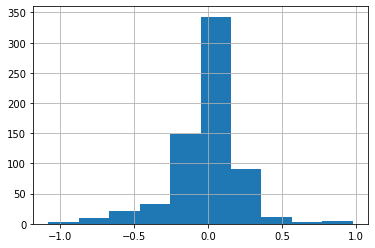

challenge_GP1BB.tsv


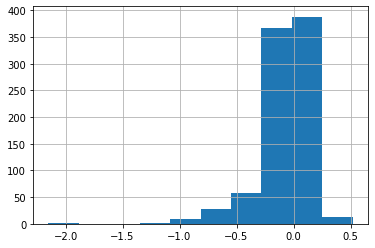

challenge_HNF4A.tsv


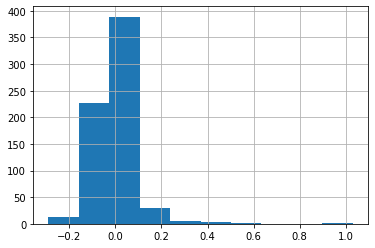

('ZFAND3', 'GP1BB', 'MYC', 'HBB', 'LDLR', 'TERT')

In [125]:
for challenge in challenges:
    plt.figure()
    print(challenge)
    gt[gt["challenge"] == challenge]["label"].hist()
    #print(np.max(abs(gt[gt["challenge"] == challenge]["label"])))
    #print(np.median(abs(gt[gt["challenge"] == challenge]["Confidence"])))
    plt.show()
    
"MSMB", "F9", "HNF4A", "SORT1", "IRF6", "IRF4", "PKLR"

"ZFAND3","GP1BB", "MYC", "HBB", "LDLR", "TERT"